# 1D FEM with Non-uniform Mesh

Solve the one-dimensional Poisson equation using linear finite elements:

$$
- \frac{d^2 u}{dx^2} = f(x), \qquad x\in[0,1], \qquad u(0)=u(1)=0
$$

- Choose a load (forcing) function $f(x)$ of your preference.
- Random sampling: generate $n$ interior nodes with random positions, include the boundary nodes $x_0 = 0$ and $x_{n+1} = 1$, and sort them in ascending order. Each element $e$ has length $h_e = x_{i+1} - x_i$.
- Plot the numerical solution $u(x)$, the load $f(x)$, and the distribution of the random nodes.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from pathlib import Path
import sys

notebook_dir = Path.cwd()
sibling = notebook_dir.parent / "Miniproyecto1" / "numericalMethods"
sys.path.insert(0, str(sibling.resolve()))

from integration import gauss_legendre

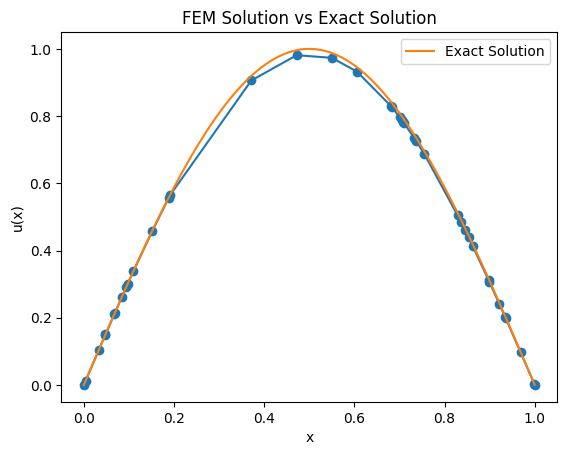

In [121]:
n = 40 # number of nodes
nodes = np.random.rand(n-2) # interior nodes
nodes = np.append(nodes, 0) # boundary node at 0
nodes = np.append(nodes, 1) # boundary node at 1
nodes = np.sort(nodes) # sort nodes

# Define the source function f(x)
x = sp.symbols('x')
f = sp.pi**2 *sp.sin(sp.pi * x)

# Assemble the stiffness matrix A and load vector b
A = np.zeros((n,n))
b = np.zeros(n)

# Fill the stiffness matrix A and load vector b
for i in range(1,n-1):
    A[i, i] = 1 / (nodes[i] - nodes[i-1]) + 1 / (nodes[i+1] - nodes[i])
    A[i, i-1] = -1 / (nodes[i] - nodes[i-1])
    A[i, i+1] = -1 / (nodes[i+1] - nodes[i])
    fi1 = f*((x-nodes[i-1])/(nodes[i]-nodes[i-1]))
    fi2 = f*(1-((x-nodes[i])/(nodes[i+1]-nodes[i])))
    b[i] = gauss_legendre(fi1, nodes[i-1], nodes[i], 5) + gauss_legendre(fi2, nodes[i], nodes[i+1], 5)

# Apply Dirichlet boundary conditions u(0) = 0, u(1) = 0
A[0,0] = 1
A[n-1,n-1] = 1
b[0] = 0
b[n-1] = 0

# Solve the linear system
u = np.linalg.solve(A,b)

# Plot the FEM solution and the exact solution
plt.plot(nodes, u, marker='o')
x_exact = np.linspace(0, 1, 100)
u_exact = np.sin(np.pi * x_exact)
plt.plot(x_exact, u_exact, label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('FEM Solution vs Exact Solution')
plt.legend()
plt.show()